## Задача 1
Сравнить МНК-оценку для линейной регрессии с методом наименьших модулей в случае, когда шум порожден из распределения Лапласа. Когда оценки совпадают, а когда сильно различаются?

Сгенерируем данные, построим линейные модели и оценим их качество через коэффициент детерминации (r2_score).

In [1]:
#необходимые модули
import numpy as np
import scipy.linalg
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import laplace
import matplotlib.pyplot as plt

Данные возьмем из нормального распределения.

In [16]:
def data(n):    
    x = np.c_[np.random.randn(n, 10), np.ones(n)]
    w = np.random.rand(11)
    y_ideal = x.dot(w)
    return x, y_ideal

In [9]:
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import r2_score

In [10]:
def absolute_deviations(coef, X, Y):
    return np.sum(np.abs(Y - X.dot(coef)))

In [11]:
#сетка по параметрам распределения шума
locs = np.arange(-100, 110, 10)
scales = np.arange(0.2, 3.0, 0.2)

n =  50


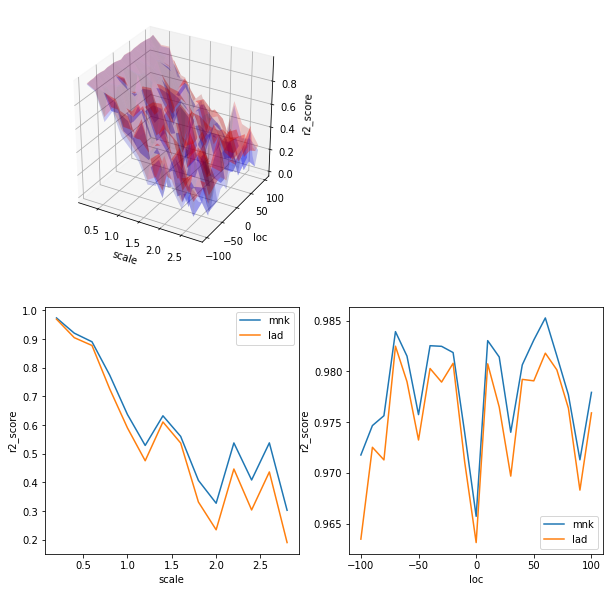

n =  1000


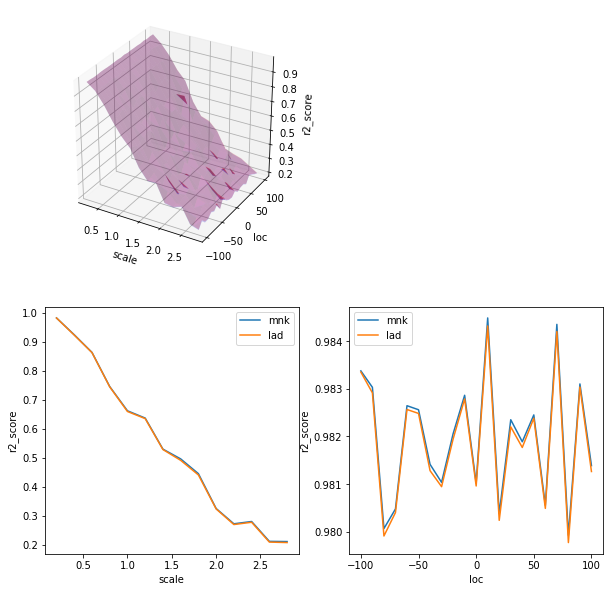

In [29]:
for n in [50, 1000]:
    d = data(n)
    x = d[0]
    y_ideal = d[1]
    
    mnk_r2 = np.array([np.zeros(14)])
    lad_r2 = np.array([np.zeros(14)])
    
    for loc in locs:
        mnk_score = []
        lad_score = []

        for scale in scales: 
            noise = np.random.laplace(loc,scale,size = n)
            y = y_ideal + noise

            #mnk
            mnk_model = OLS(y,x).fit()
            mnk_pred = mnk_model.predict(x)
            mnk_score.append(r2_score(y, mnk_pred))

            #lad
            output = minimize(absolute_deviations, np.ones(11)/2, args=(x, y))
            lad_pred = x.dot(output.x)
            lad_score.append(r2_score(y, lad_pred))

        mnk_r2 = np.concatenate((mnk_r2, [mnk_score]), axis=0)
        lad_r2 = np.concatenate((lad_r2, [lad_score]), axis=0)
    
    mnk_r2 = np.delete(mnk_r2,0,0)
    lad_r2 = np.delete(lad_r2,0,0)
    
    print('n = ', n)
    fig = plt.figure(figsize = (10,10))
    #ax = fig.gca(projection='3d')
    #ax = fig.gca(projection='3d')
    
    ax = fig.add_subplot(221, projection='3d')
    X, Y = np.meshgrid(scales, locs)
    ax.plot_surface(X, Y, mnk_r2, rstride=1, cstride=1, alpha=0.2, color = 'r', label = 'mnk')
    ax.plot_surface(X, Y, lad_r2, rstride=1, cstride=1, alpha=0.2, color = 'b', label = 'lad')
    #ax.scatter(locs, scales, mnk_r2)
    ax.set_xlabel('scale')
    ax.set_ylabel('loc')
    ax.set_zlabel('r2_score')
    #ax.title('n = {}'.format(n))
    #ax.legend()
    #ax.axis('equal')
    #ax.axis('tight')
    #plt.show()
    
    ax = fig.add_subplot(223) #зависимость от дисперсии при нулевом матожидании
    ax.plot(scales, mnk_r2[13],label = 'mnk')
    ax.plot(scales, lad_r2[13], label = 'lad')
    ax.set_xlabel('scale')
    ax.set_ylabel('r2_score')
    ax.legend()
    #plt.show()
    
    ax = fig.add_subplot(224) #зависимость от матожидания при наименьшей дисперсии
    ax.plot(locs, mnk_r2[:,0],label = 'mnk')
    ax.plot(locs, lad_r2[:,0], label = 'lad')
    ax.set_xlabel('loc')
    ax.set_ylabel('r2_score')
    ax.legend()
    plt.show()
    

### Выводы:
Качества моделей на выборках большого размера практически совпадают.
На небольших выборках видна разница в качествах моделей в зависимости от параметров распределения шума. 